<a href="https://colab.research.google.com/github/yashpapa6969/3-sem-dsa-lab/blob/main/dogs_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install opencv-python
!pip install -U -q tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.1

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"venkateshr3","key":"ca4170c23f2360eb5cecbed0d32f8940"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:23<00:00, 33.7MB/s]
100% 812M/812M [00:23<00:00, 35.9MB/s]


In [ ]:
import os
import cv2
import imghdr
import zipfile
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.9.0


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:


def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:

def unzip_data(filename):

  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:

def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
unzip_data("dogs-vs-cats.zip")

In [ ]:
walk_through_dir("flood_dataset")

In [ ]:
unzip_data("test1.zip")
unzip_data("train.zip")

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
data_dir = 'flood_dataset'

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

train
test


In [ ]:
for classes in os.listdir(os.path.join(data_dir, image_class)):
 for image in os.listdir(os.path.join(data_dir, image_class,classes)):
   print(image)

sddefault.jpg
White-Broken-1.jpg
images710.jpg
images622.jpg
images641.jpg
images720.jpg
ttar-pradesh-crowded-tuktuks-are-a-common-sight-on-the-roads-in-india-RTXHJE.jpg
images657.jpg
road-accident.jpg
Mumbai_Traffic_cop_1683202031508_1683202037338.png
images740.jpg
images681.jpg
images695.jpg
images650.jpg
images653.jpg
images719.jpg
nationalherald2F2022-092F959bde16-2ecb-4eb3-8775-33c721b084822FAccident_deaths.jpg
Yellow-Broken.jpg
images642.jpg
images723.jpg
images715.jpg
yellow-tuk-tuk-roads-mumbai-cheap-popular-passenger-transportation-197698665.jpg
page_1.jpg
images718.jpg
images632.jpg
images725.jpg
-running-regular-government-bus-credit-sumit-saraswatalamy-live-news-2C4WK5N.jpg
images735.jpg
toy-car-viral-video.jpg
images742.jpg
images707.jpg
n-india-may-20-2020-people-coming-out-few-vehicles-on-road-with-less-traffic.jpg
images732.jpg
India_roadway_map.svg
images647.jpg
images702.jpg
images724.jpg
images646.jpg
images638.jpg
images690.jpg
vehicle_660_280321013148.jpg
images712

In [ ]:
for image_class in os.listdir(data_dir):
  for classes in os.listdir(os.path.join(data_dir, image_class)):
    for image in os.listdir(os.path.join(data_dir, image_class,classes)):
        image_path = os.path.join(data_dir, image_class,classes, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list flood_dataset/train/no_flood/1200px-I-80_Eastshore_Fwy.jpg
Image not in ext list flood_dataset/train/no_flood/220px-Vehicles_plying_on_Bengaluru_Mysuru_Expressway.jpg
Image not in ext list flood_dataset/train/no_flood/220px-Trivandrum_Kerala_India_Road.jpg
Image not in ext list flood_dataset/train/no_flood/acj-1007-beautiful-highways-in-india-2.jpg
Image not in ext list flood_dataset/train/no_flood/1200px-401_Gridlock.jpg
Image not in ext list flood_dataset/train/flood/FLOOD.jpg
Image not in ext list flood_dataset/train/flood/64685731.jpg
Image not in ext list flood_dataset/train/flood/77592360.jpg
Image not in ext list flood_dataset/train/flood/IMAGE_1655552594.webp
Image not in ext list flood_dataset/test/no_flood/road-accident.jpg
Image not in ext list flood_dataset/test/no_flood/nationalherald2F2022-092F959bde16-2ecb-4eb3-8775-33c721b084822FAccident_deaths.jpg
Image not in ext list flood_dataset/test/no_flood/n-india-may-20-2020-people-coming-out-few-vehicles-

In [ ]:
walk_through_dir("flood_dataset")

There are 2 directories and 0 images in 'flood_dataset'.
There are 2 directories and 0 images in 'flood_dataset/train'.
There are 0 directories and 395 images in 'flood_dataset/train/no_flood'.
There are 0 directories and 396 images in 'flood_dataset/train/flood'.
There are 2 directories and 0 images in 'flood_dataset/test'.
There are 0 directories and 100 images in 'flood_dataset/test/no_flood'.
There are 0 directories and 83 images in 'flood_dataset/test/flood'.


In [ ]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import shutil

In [ ]:
train_dir = "train/"
test_dir = "test1/"

In [ ]:
os.makedirs(train_dir + 'cats',exist_ok=True)
cat_dir = ('train/cats/')
os.makedirs(train_dir + 'dogs',exist_ok=True)
dog_dir = ('train/dogs/')

dirs = [each for each in os.listdir(train_dir)]

for file in dirs:
    folder = file.split(".")[0]
    if folder == 'cat':
        shutil.move(train_dir+file, cat_dir)
    elif folder == 'dog':
        shutil.move(train_dir+file, dog_dir)

In [ ]:
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='binary',
                                                                image_size=IMG_SIZE)
# test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
#                                                                 label_mode="binary",
#                                                                 image_size=IMG_SIZE)

Found 25000 files belonging to 2 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [ ]:
input_shape = (224, 224, 3)

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(include_top=False)
base_model.trainable = False

In [ ]:
!pip install keras-rl2

In [ ]:
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(1, activation='sigmoid', name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
checkpoint_path = "model_checkpoints_weights/checkpoint.ckpt"


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
initial_epochs = 5
data_aug = model_2.fit(train_data,
                        epochs=initial_epochs,
                        validation_data=train_data,
                        validation_steps=int(0.25 * len(train_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/data_aug/20230808-123806
Epoch 1/5
782/782 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9634
Epoch 1: val_loss improved from inf to 0.02987, saving model to model_checkpoints_weights/checkpoint.ckpt
782/782 [==============================] - 308s 361ms/step - loss: 0.1077 - accuracy: 0.9634 - val_loss: 0.0299 - val_accuracy: 0.9933
Epoch 2/5
782/782 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9751
Epoch 2: val_loss improved from 0.02987 to 0.02379, saving model to model_checkpoints_weights/checkpoint.ckpt
782/782 [==============================] - 203s 259ms/step - loss: 0.0662 - accuracy: 0.9751 - val_loss: 0.0238 - val_accuracy: 0.9936
Epoch 3/5
782/782 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9756
Epoch 3: val_loss improved from 0.02379 to 0.02128, saving model to model_checkpoints_weights/checkpoint.ckpt
782/782 [==============================] - 

In [ ]:

base_model.trainable = True
for layer in base_model.layers[:-15]:
  layer.trainable = False

model_2.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_s

In [ ]:

fine_tune_epochs = initial_epochs + 5

fine_data_aug = model_2.fit(train_data,
                      epochs=fine_tune_epochs,
                      validation_data=train_data,
                      initial_epoch=data_aug.epoch[-1],
                      validation_steps=int(0.25 * len(train_data)),
                      callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_last_15")])

Saving TensorBoard log files to: transfer_learning/fine_tune_last_15/20230808-125614
Epoch 5/10
782/782 [==============================] - 169s 201ms/step - loss: 0.0545 - accuracy: 0.9779 - val_loss: 0.0117 - val_accuracy: 0.9965
Epoch 6/10
782/782 [==============================] - 145s 186ms/step - loss: 0.0470 - accuracy: 0.9819 - val_loss: 0.0108 - val_accuracy: 0.9968
Epoch 7/10
782/782 [==============================] - 144s 184ms/step - loss: 0.0397 - accuracy: 0.9851 - val_loss: 0.0080 - val_accuracy: 0.9981
Epoch 8/10
782/782 [==============================] - 137s 175ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.0088 - val_accuracy: 0.9976
Epoch 9/10
782/782 [==============================] - 142s 181ms/step - loss: 0.0326 - accuracy: 0.9880 - val_loss: 0.0067 - val_accuracy: 0.9976
Epoch 10/10
782/782 [==============================] - 135s 173ms/step - loss: 0.0284 - accuracy: 0.9894 - val_loss: 0.0077 - val_accuracy: 0.9968


In [ ]:
results_data_aug = model_2.evaluate(train_data)
results_data_aug

782/782 [==============================] - 71s 91ms/step - loss: 0.0070 - accuracy: 0.9977


[0.0069604068994522095, 0.9976800084114075]

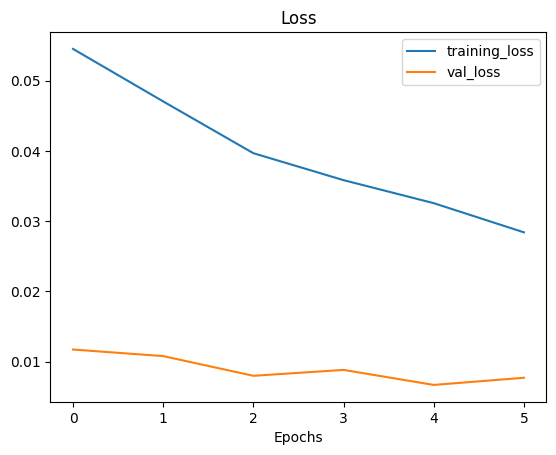

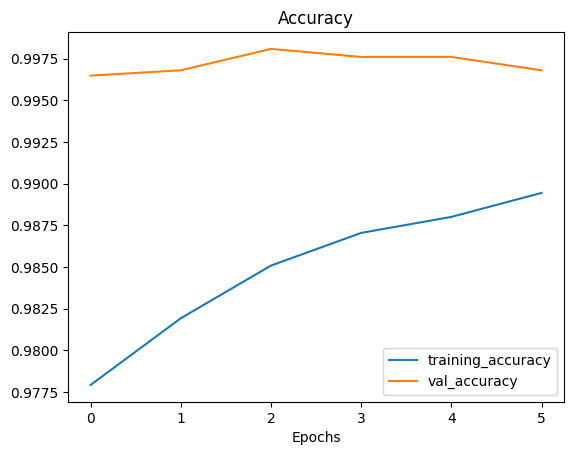

In [ ]:
plot_loss_curves(fine_data_aug)

In [ ]:
checkpoint_dir=os.path.dirname(checkpoint_path)
os.listdir(checkpoint_dir)

['checkpoint', 'checkpoint.ckpt.data-00000-of-00001', 'checkpoint.ckpt.index']

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 6,576,520
Trainable params: 1,358,801
Non-tra

In [ ]:
model=model_2
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(train_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

782/782 - 66s - loss: 0.0207 - accuracy: 0.9940 - 66s/epoch - 84ms/step
Restored model, accuracy: 99.40%


**<H2>EVALUATION<H2>**


In [ ]:
model.save('imageclassifier.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.evaluate(test_data)

6/6 [==============================] - 4s 84ms/step - loss: 0.2367 - accuracy: 0.9126


[0.23667243123054504, 0.9125683307647705]

In [ ]:
import cv2

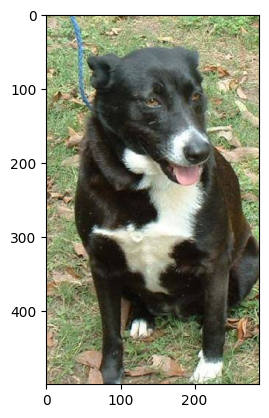

In [ ]:
img = cv2.imread('/content/test1/1000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

In [ ]:
image = tf.image.resize(img, (224,224))

In [ ]:
import numpy as np

In [ ]:
yhat = model.predict(np.expand_dims(image, 0))

1/1 [==============================] - 2s 2s/step


In [1]:
classes = ["cats","dogs"]

In [2]:
classes[0]

'cats'

In [4]:
classes[int(np.round(yhat))]

NameError: ignored

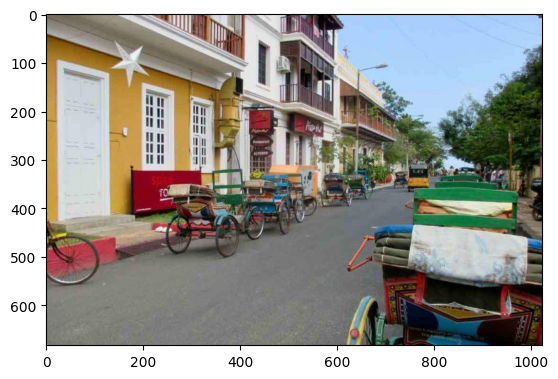

In [ ]:
img = cv2.imread('/content/test1/10001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

In [3]:
image = tf.image.resize(img, (224,224))
yhat = model.predict(np.expand_dims(image, 0))
classes[int(np.round(yhat))]

NameError: ignored